## Heba Allah Emad 

In [40]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df_store=pd.read_csv('SampleSuperstore.csv')
df_store

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [42]:
df_store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [43]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Data Cleaning 

In [44]:
df_store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [45]:
df_store.duplicated().sum()

17

 this data have duplicated values so i will drop this data 

In [46]:
df_store.drop_duplicates(inplace=True)
df_store.duplicated().sum()

0

In [47]:
import pandas_profiling
pandas_profiling.ProfileReport(df_store)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## What is the most profitable category ?

<AxesSubplot:xlabel='Category', ylabel='count'>

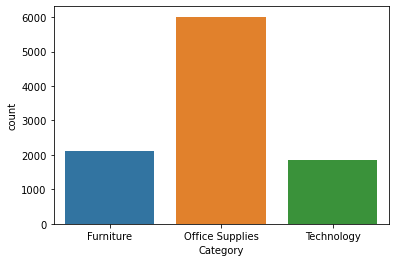

In [48]:
sns.countplot(x='Category', data=df_store)

In [49]:
df_store.groupby('Category').agg({'Quantity':'sum'}).sort_values('Quantity', ascending = False)

,Quantity
Category,
Office Supplies,22861
Furniture,8020
Technology,6939


In [50]:
categ = df_store.groupby(['Category'])[['Sales', 'Profit']].mean()
categ 

,Sales,Profit
Category,,
Furniture,350.002981,8.697740
Office Supplies,119.550107,20.353403
Technology,452.709276,78.752002


<AxesSubplot:xlabel='Category'>

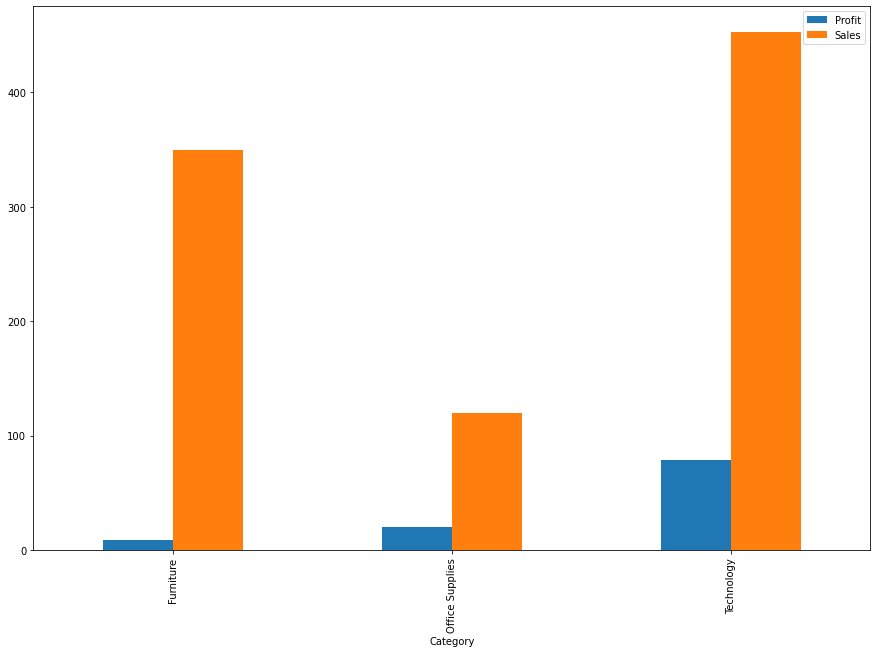

In [51]:
categ.sort_values('Profit')[['Profit','Sales']].plot(kind='bar', figsize=(15,10))

Now we can see that although the percentage of demand for Office Supplies is higher than Furniture&Technology ,Furniture&Technology achieved a higher profit rate.

## What is most profitable Sub-Category

In [52]:
df_store['Profit Margin'] = df_store['Profit'] / df_store['Sales']

In [53]:
sorted_data = df_store.sort_values(by='Profit Margin', ascending=False)

In [54]:
print("Top 10 most profitable Sub-Category:")
print(sorted_data[['Sub-Category', 'Profit Margin']].head(10))

Top 10 most profitable Sub-Category:
     Sub-Category  Profit Margin
6264      Binders            0.5
764     Envelopes            0.5
3681      Binders            0.5
9668    Envelopes            0.5
7794        Paper            0.5
4416    Fasteners            0.5
9883    Envelopes            0.5
5191    Envelopes            0.5
770       Binders            0.5
6250        Paper            0.5


In [55]:
print("Top 10 least profitable products:")
print(sorted_data[['Sub-Category', 'Profit Margin']].tail(10))

Top 10 least profitable products:
     Sub-Category  Profit Margin
6903   Appliances          -2.70
8246   Appliances          -2.70
6561   Appliances          -2.70
4980   Appliances          -2.70
6989   Appliances          -2.70
4437   Appliances          -2.70
8766   Appliances          -2.75
676    Appliances          -2.75
9164   Appliances          -2.75
261    Appliances          -2.75


## sales and profit for each region

In [56]:
region_data = df_store.groupby('Region')[['Sales', 'Profit']].sum()
region_data

,Sales,Profit
Region,,
Central,500782.8528,39655.8752
East,678435.1960,91506.3092
South,391721.9050,46749.4303
West,725255.6365,108329.8079


In [57]:
region_data['Profit Margin'] = region_data['Profit'] / region_data['Sales']



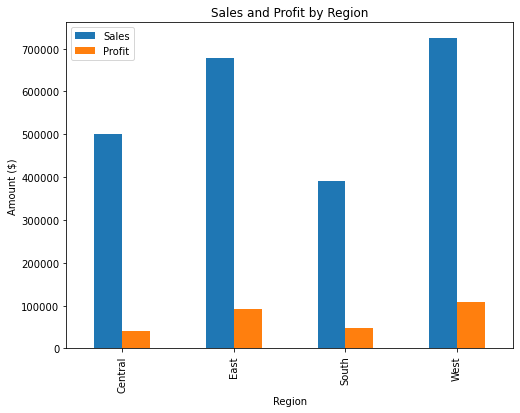

In [58]:
region_data[['Sales', 'Profit']].plot(kind='bar', figsize=(8, 6))
plt.xlabel("Region")
plt.ylabel("Amount ($)")
plt.title("Sales and Profit by Region")
plt.show()

Text(0.5, 1.0, 'Category vs Profit')

<Figure size 432x288 with 0 Axes>

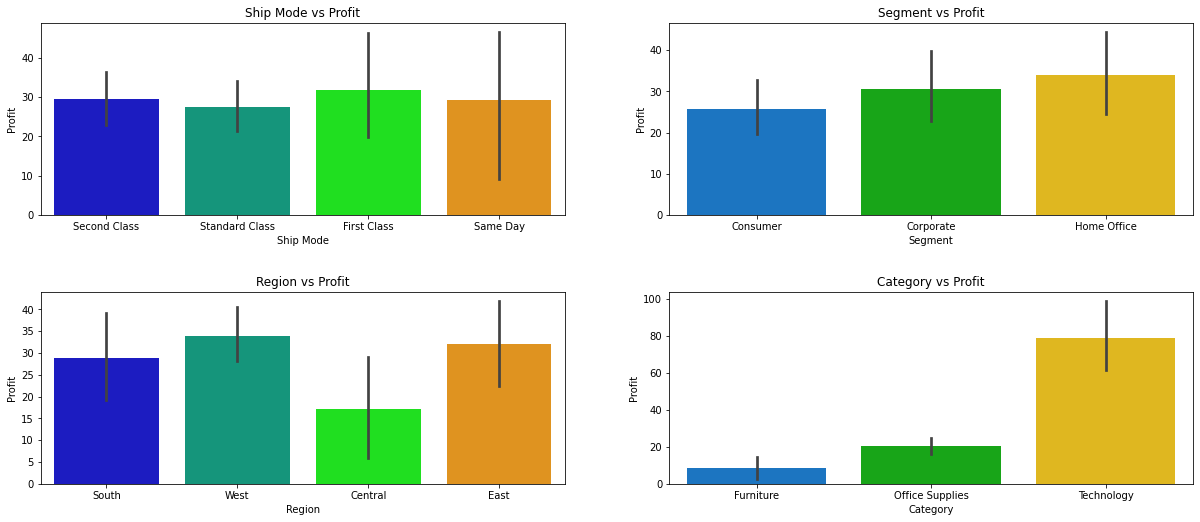

In [64]:
plt.figure(1)
plt.figure(figsize = (20, 8))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.4)
# Column (Ship Mode vs Profit)
plt.subplot(221)
sns.barplot(x = df_store['Ship Mode'], y = df_store['Profit'], palette = "nipy_spectral")
plt.title('Ship Mode vs Profit')
# Column (Segment vs Profit)
plt.subplot(222)
sns.barplot(x = df_store['Segment'], y = df_store['Profit'], palette = "nipy_spectral")
plt.title('Segment vs Profit')
# Column (Region vs Profit)
plt.subplot(223)
sns.barplot(x = df_store['Region'], y = df_store['Profit'], palette = "nipy_spectral")
plt.title('Region vs Profit')
# Column (Category vs Profit)
plt.subplot(224)
sns.barplot(x = df_store['Category'], y = df_store['Profit'], palette = "nipy_spectral")
plt.title('Category vs Profit')

## Impact of discounts on profitability

In [65]:
# calculate profit margin with and without discounts
data_discounts = df_store.groupby('Discount').agg({'Profit': 'mean', 'Sales': 'sum', 'Quantity': 'sum'})


In [66]:
# calculate profit margin for orders with discounts
data_discounts_with_discount = df_store[df_store['Discount'] > 0].groupby('Discount').agg({'Profit': 'mean', 'Sales': 'sum', 'Quantity': 'sum'})


In [67]:
# calculate profit margin for orders without discounts
data_discounts_no_discount = df_store[df_store['Discount'] == 0].groupby('Discount').agg({'Profit': 'mean', 'Sales': 'sum', 'Quantity': 'sum'})


Text(0.5, 1.0, 'Profit margin by discount level')

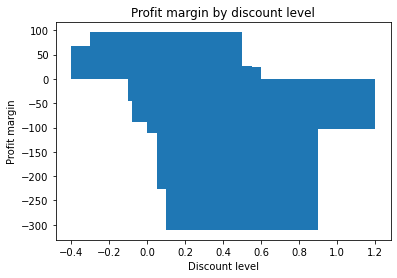

In [68]:
fig, ax = plt.subplots()
ax.bar(data_discounts.index, data_discounts['Profit'])
ax.set_xlabel('Discount level')
ax.set_ylabel('Profit margin')
ax.set_title('Profit margin by discount level')

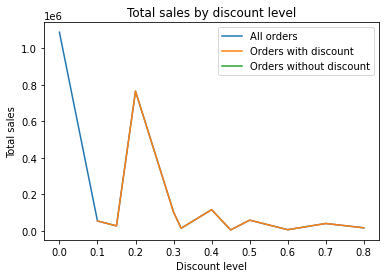

In [69]:
fig, ax = plt.subplots()
ax.plot(data_discounts['Sales'], label='All orders')
ax.plot(data_discounts_with_discount['Sales'], label='Orders with discount')
ax.plot(data_discounts_no_discount['Sales'], label='Orders without discount')
ax.set_xlabel('Discount level')
ax.set_ylabel('Total sales')
ax.set_title('Total sales by discount level')
ax.legend()

visualizes the results using a bar chart of profit margin by discount level and a line chart of total sales by discount level, comparing orders with and without discounts. This can help identify the impact of discounts on profitability and whether they are having a positive or negative impact.